In [24]:
from sspredict.make_prediction.read_input import read_inputjson_edge_single_calculation
from sspredict.make_prediction.make_composition import build_mesh_ternary
from sspredict.make_prediction.models import ss_edge_model_T, ss_edge_model_T_w_uncertainty
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [25]:
FCC_file = '../examples/FCC_edge/NiCoFeCr/sample_input_FCC_single_compositions.json'

In [26]:
input_data = read_inputjson_edge_single_calculation(FCC_file)
input_data.check_integrity_curtin_edge()
input_data.grab_properties_curtin_edge()

In [27]:
# calculate without uncertainty
model = ss_edge_model_T(input_data.adjustable_scalers,input_data.exp_conditions,
                            input_data.element_composition,input_data.elements_data,input_data.structure)

model.calculate()


In [28]:
# calculate with uncertainty 
model_mc = ss_edge_model_T_w_uncertainty(ss_edge_model_T,input_data.adjustable_scalers,
                            input_data.exp_conditions,input_data.element_composition,
                            input_data.elements_data,input_data.uncertainty_levels,input_data.structure)
model_mc.calculate()


In [29]:
# 25-25-25-25 composition 
model.calc_data_all[model.calc_data_all['Co']==25]
T = (model.calc_data_all[model.calc_data_all['Co']==25]['T'])
sigma_ss_FCC = (model.calc_data_all[model.calc_data_all['Co']==25]['Delta_sigma_ss'])
sigma_ss_FCC_mc = (model_mc.calc_data_all[model_mc.calc_data_all['Co']==25]['Delta_sigma_ss'])
sigma_ss_FCC_mc_std = model_mc.calc_data_all[model.calc_data_all['Co']==25]['std_Delta_sigma_ss']


In [30]:
paper_data_FCC = pd.read_csv('./NiCoFeCr_paper_extrated.csv',sep='\s+')


No handles with labels found to put in legend.


Text(0, 0.5, 'Delta_sigma_ss (MPa)')

<Figure size 432x288 with 0 Axes>

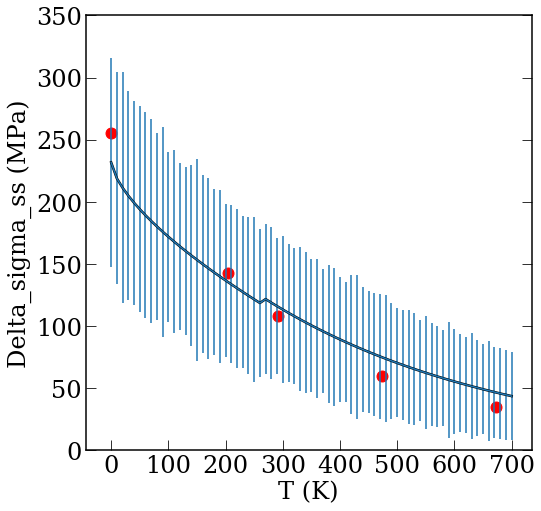

In [31]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

#ax1.set_xlim(0.0,1501)
ax1.set_ylim(0,350)


colors=np.array([[0,0,0],[30,136,229],[225,193,7],[212,27,93]])/256

ax1.plot(T,sigma_ss_FCC,color='k',mec='k',mfc='None',ms=12,ls='-',lw=2.5,label='')
ax1.errorbar(T,sigma_ss_FCC_mc,sigma_ss_FCC_mc_std)
ax1.scatter(paper_data_FCC['x'],paper_data_FCC['y'],120,color='r')
ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('T (K)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel('Delta_sigma_ss (MPa)',fontproperties=ticks_font)